In [1]:
# 기본 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# CSV 파일을 데이터프레임으로 변환
df = pd.read_csv('auto-mpg.csv', header=None)

# 열 이름 지정
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
              'acceleration', 'model years', 'origin', 'name']

# 데이터 살펴보기
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model years,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model years   398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [3]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model years,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [4]:
# 누락 데이터 확인
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model years     0
origin          0
name            0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

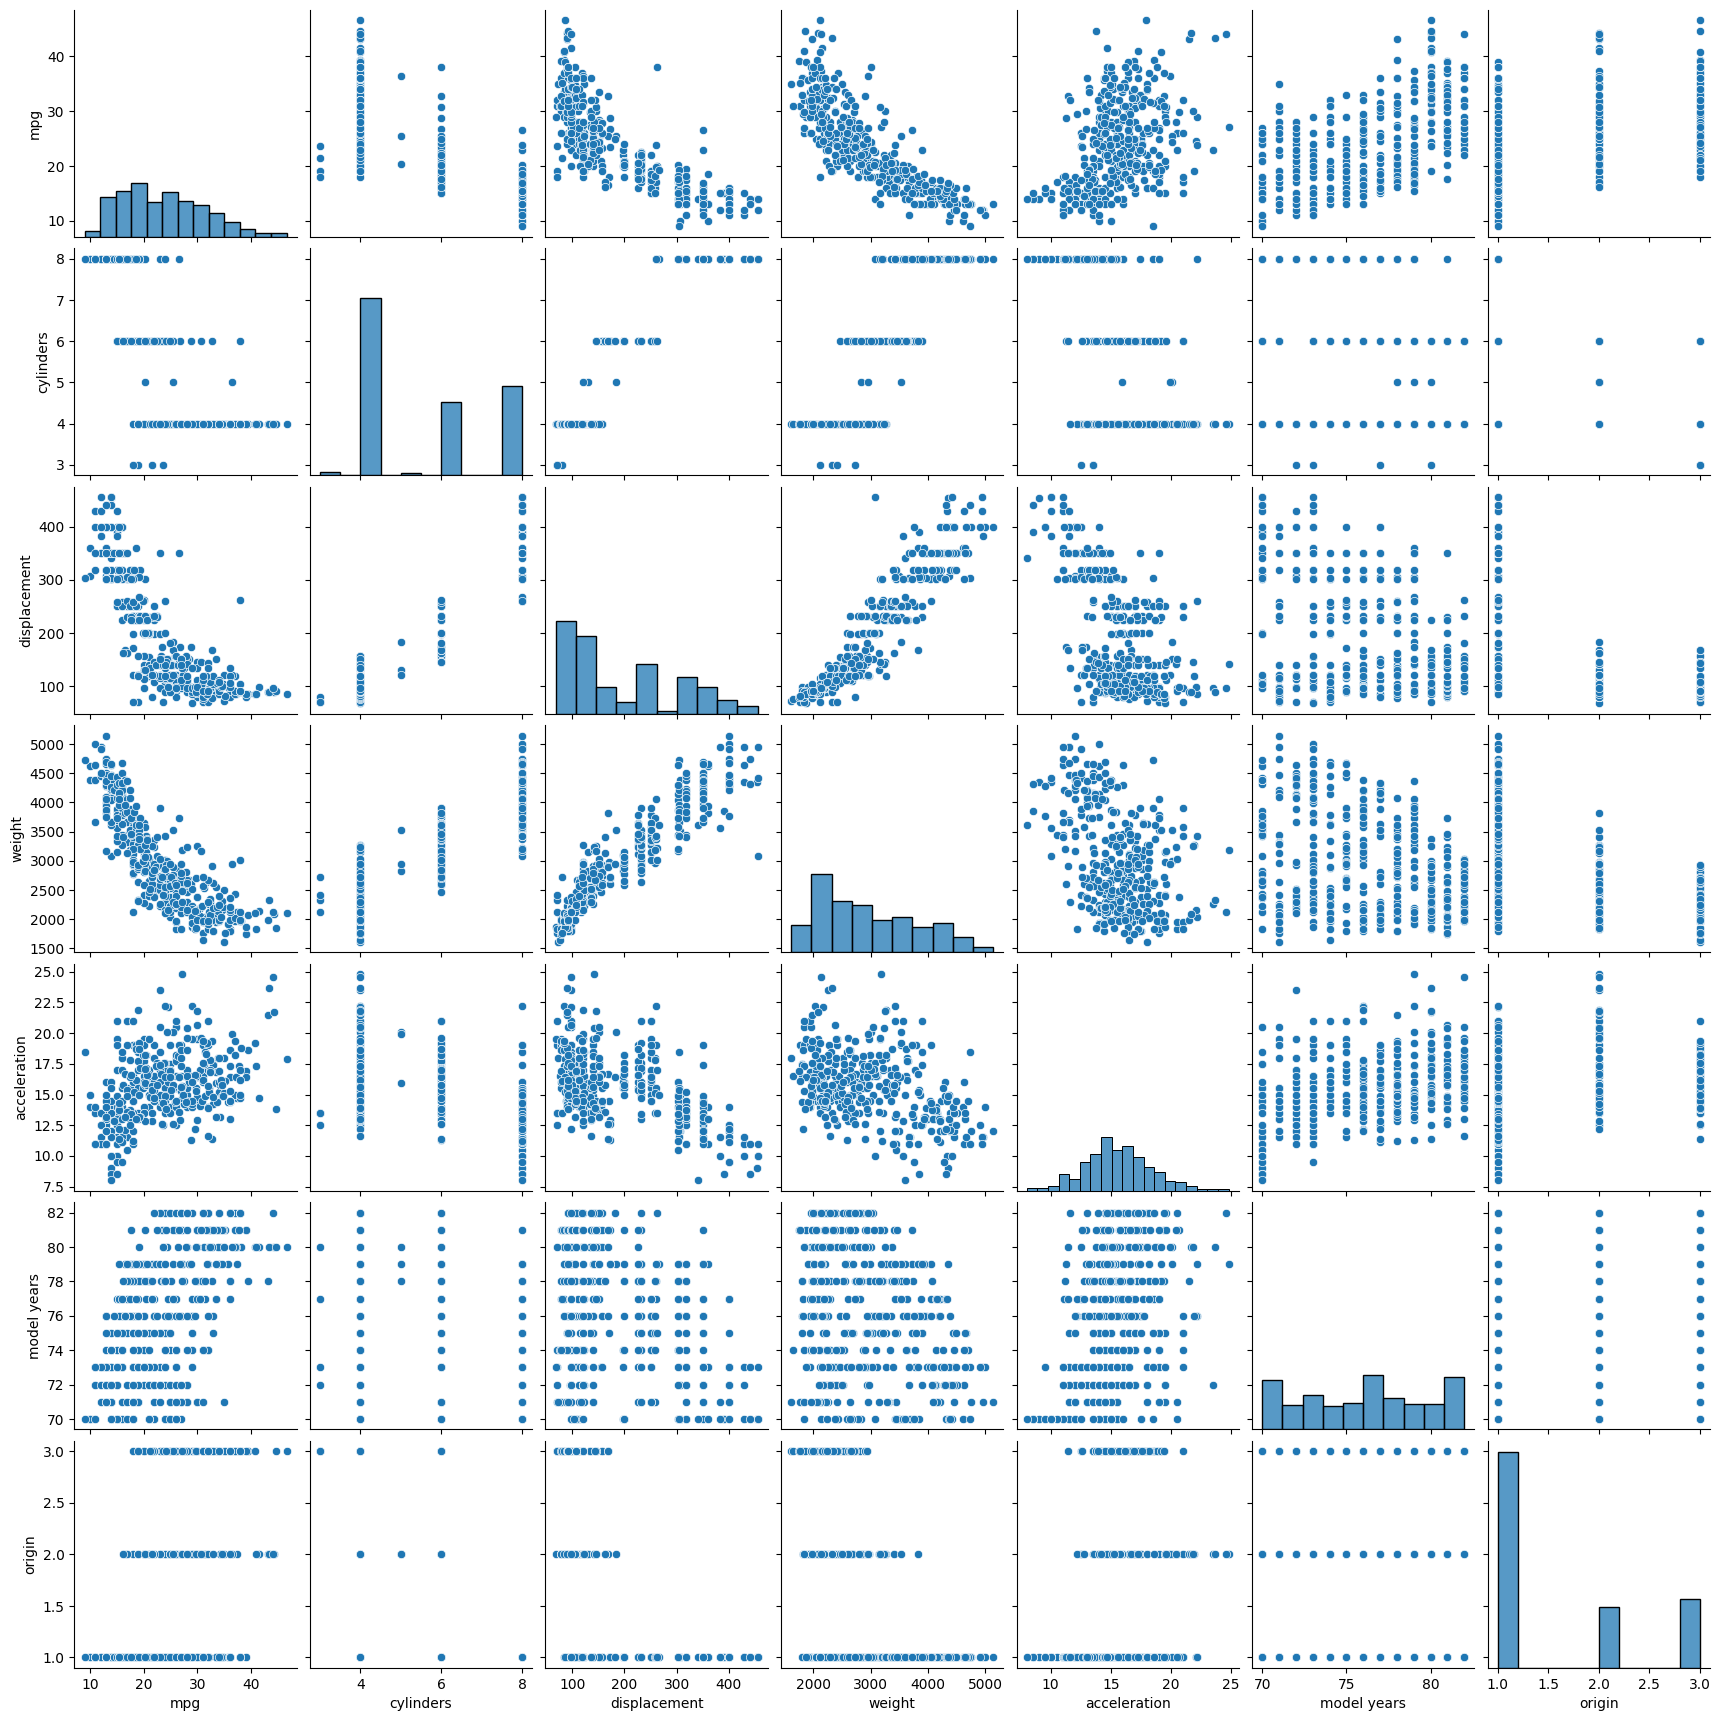

In [6]:
# seaborn pairplot
sns.pairplot(df);

In [7]:
# 상관계수 분석 - 데이터프레임
corr = df.corr(numeric_only=True)
corr

,mpg,cylinders,displacement,weight,acceleration,model years,origin
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873
model years,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000


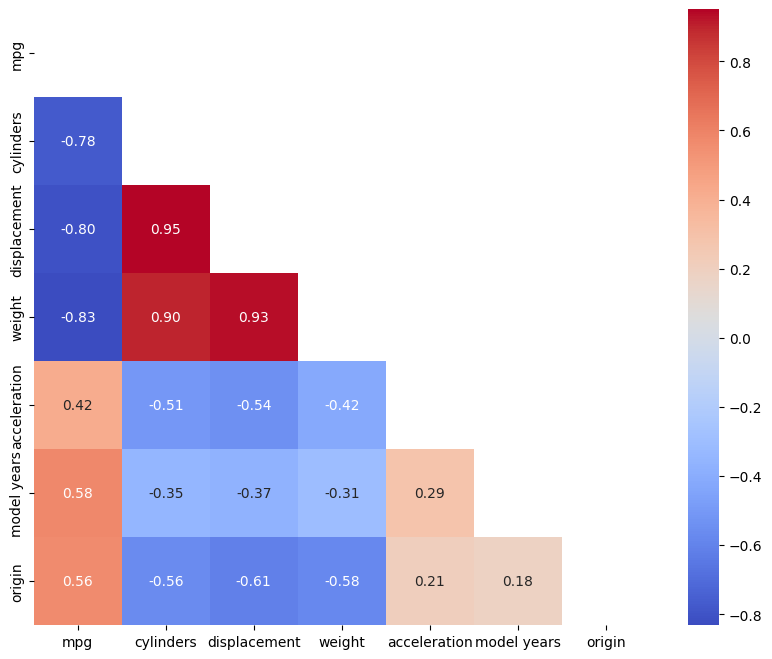

In [8]:
# 상관계수 분석 - 히트맵
mask = np.triu(np.ones_like(corr, dtype=bool))

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(corr, mask=mask, cmap='coolwarm',
            annot=True, fmt=".2f", cbar=True, square=True)
plt.show()

In [9]:
# horsepower 열의 고유값 확인
df['horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [10]:
# horsepower 열의 자료형 변경(문자열 -> 숫자)

df['horsepower'] = df['horsepower'].replace('?', np.nan)
df['horsepower'] = df['horsepower'].astype('float')

df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model years,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [11]:
# 결측치 제거
print(df['horsepower'].isnull().sum())

6


In [12]:
df_nan = df.dropna(subset=['horsepower'], axis=0)
df_nan

,mpg,cylinders,displacement,horsepower,weight,acceleration,model years,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


In [13]:
print(df_nan['horsepower'].isnull().sum())

0


In [14]:
# 상관계수 분석 - 데이터프레임
corr = df.corr(numeric_only=True)
corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,model years,origin
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137,0.205873
model years,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.455171,-0.581024,0.205873,0.180662,1.000000


In [15]:
# 분석에 활용할 열(속성) 선택(연비, 실린더, 출력, 중량)
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]
ndf.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504.0
1,15.0,8,165.0,3693.0
2,18.0,8,150.0,3436.0
3,16.0,8,150.0,3433.0
4,17.0,8,140.0,3449.0


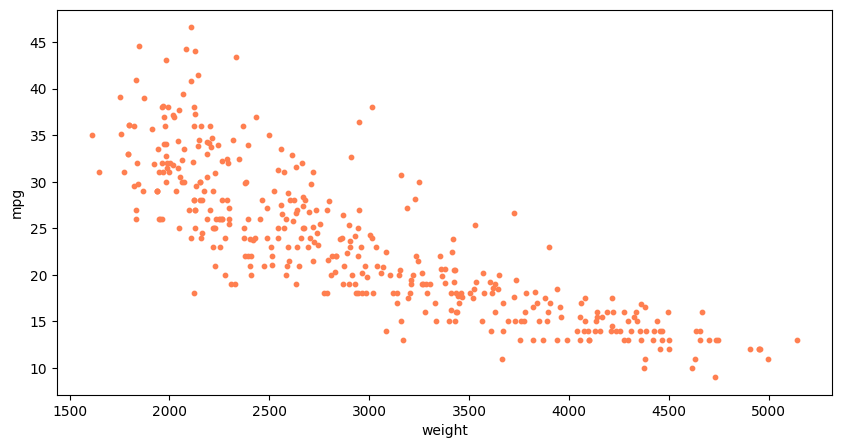

In [16]:
### 종속 변수 Y인 "연비(mpg"와 다른 변수 간의 선형관계를 그래프(산점도)로 확인
# Pandas 함수로 산점도 그리기
ndf.plot(kind='scatter', x='weight', y='mpg', c='coral', s=10, figsize=(10, 5))
plt.show()

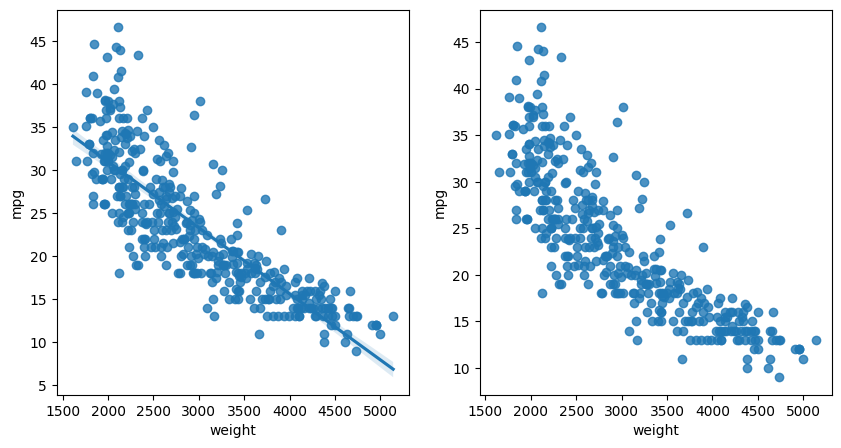

In [17]:
# seaborn으로 산점도 그리기
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
sns.regplot(x='weight', y='mpg', data=ndf, ax=ax1)
sns.regplot(x='weight', y='mpg', data=ndf, ax=ax2, fit_reg=False)
plt.show()

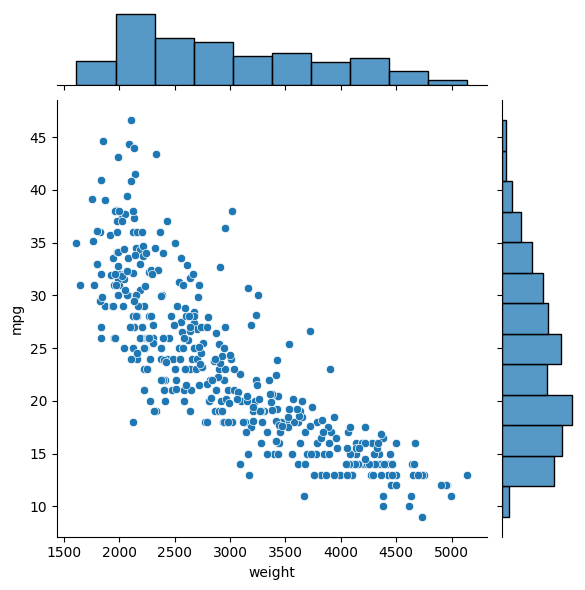

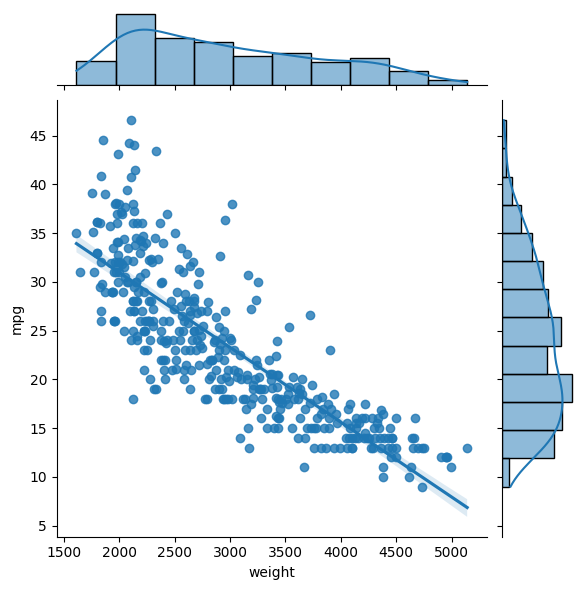

In [18]:
# seaborn 조인트 그래프 - 산점도, 히스토그램
sns.jointplot(x='weight', y='mpg', data=ndf)
sns.jointplot(x='weight', y='mpg', kind='reg', data=ndf)

In [19]:
# 속성(변수) 선택
X=ndf[['weight']]
y=ndf['mpg']

# train data와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=10)

print('train data 개수: ', len(X_train))
print('test data 개수: ', len(X_test))

train data 개수:  278
test data 개수:  120


In [20]:
# sklearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import LinearRegression

# 단순회귀분석 모델 객체 생성
lr = LinearRegression()

# train data를 가지고 모델 학습
lr.fit(X_train, y_train)

# 학습을 마친 모델에 test data를 적용하여 결정개수(R-제곱) 계산
r_square = lr.score(X_test, y_test)
print('R^2 결정계수: ', r_square)

R^2 결정계수:  0.689363809315209


In [21]:
# 회기식의 기울기
print('기울기 a: ', lr.coef_)

# 회기식의 y절편
print('y절편 b', lr.intercept_)

기울기 a:  [-0.0076554]
y절편 b 46.60365052224634


In [22]:
# 모델에 test data 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교
y_hat = lr.predict(X_test)

# 오차 계산
test_preds = pd.DataFrame(y_test)
test_preds.columns = ['y_test']
test_preds['y_hat'] = y_hat
test_preds['squared_error'] = (test_preds['y_hat'] - test_preds['y_test'])**2
test_preds

,y_test,y_hat,squared_error
331,33.8,30.182824,13.083965
111,18.0,30.343587,152.364137
350,34.7,29.646946,25.533357
205,28.0,30.106270,4.436372
56,26.0,31.637349,31.779704
...,...,...,...
17,21.0,26.799138,33.630001
225,17.5,19.656652,4.651150
223,15.5,14.910306,0.347739
59,23.0,29.348385,40.301995


In [23]:
# 평균 제곱 오차
mse = test_preds['squared_error'].mean()
print('mse: ', mse)

mse:  17.898336128759958


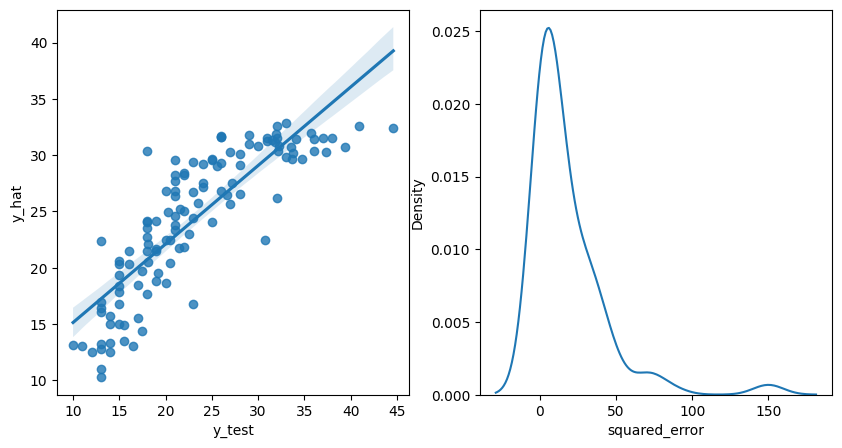

In [24]:
# 오차 분석
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.regplot(x='y_test', y='y_hat', data=test_preds, ax=axes[0]);
sns.kdeplot(x='squared_error', data=test_preds, ax=axes[1]);

In [25]:
# 기본 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# CSV 파일을 데이터프레임으로 변환
df = pd.read_csv('auto-mpg.csv', header = None)
df

# 열 이름 지정
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower',
              'weight', 'acceleration', 'model year', 'origin', 'name']

# horsepower 열의 자료형 변경(문자열 -> 숫자)
df['horsepower'] = df['horsepower'].replace('?', np.nan)
df['horsepower'] = df['horsepower'].astype('float')

# 결측치 대체
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].mean())

# 분석에 활용할 열(속성)을 선택(연비, 실린더, 출력, 중량)
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]

# ndf 데이터를 train data 와 test data로 구분(7:3 비율)
X=ndf[['weight']]
y=ndf['mpg']

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

print('훈련 데이터: ', X_train.shape)
print('검증 데이터: ', X_test.shape)

훈련 데이터:  (278, 1)
검증 데이터:  (120, 1)


In [26]:
# sklearn 라이브러리에서 필요한 모듈 가져오기
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_train_poly=poly.fit_transform(X_train)

print('원본 데이터: ', X_train.shape)
print('2차형 변환 데이터: ', X_train_poly.shape)

원본 데이터:  (278, 1)
2차형 변환 데이터:  (278, 3)


In [27]:
# train data를 가지고 모형 학습
pr = LinearRegression()
pr.fit(X_train_poly, y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
X_test_poly = poly.fit_transform(X_test)
r_square = pr.score(X_test_poly, y_test)
print('R^2 결정계수: ', r_square)

R^2 결정계수:  0.7255470154174082


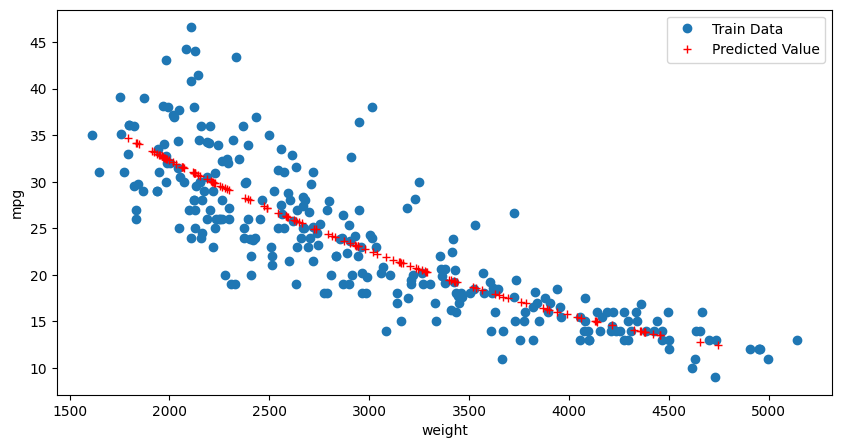

In [28]:
# train data의 산점도와 test data로 예측한 회귀선을 그래프로 출력
y_hat_test = pr.predict(X_test_poly)

fig, axes = plt.subplots(figsize=(10, 5))
axes.plot(X_train, y_train, 'o', label='Train Data')
axes.plot(X_test, y_hat_test, 'r+', label='Predicted Value')
axes.legend(loc='best')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()

In [29]:
# 모델에 test data 데이터를 입력하여 예측한 값 y_hat_test를 실제 값 y_hat_test를 실제 값 y_test와 비교
# 오차 계산
test_preds = pd.DataFrame(y_test)
test_preds.columns = ['y_test']
test_preds['y_hat'] = y_hat_test
test_preds['squared_error'] = (test_preds['y_hat'] - test_preds['y_test'])**2

# 평균 제곱 오차
mse = test_preds['squared_error'].mean()
print('mse: ', mse)

mse:  15.813520500530368


In [30]:
# 사이킷런 함수 활용 (평균 제곱 오차)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_hat_test)
print('mse: ', mse)

mse:  15.813520500530368


In [31]:
# 평균 절대값 오차
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_hat_test)
print('mae: ', mae)

mae:  3.1405650734475734


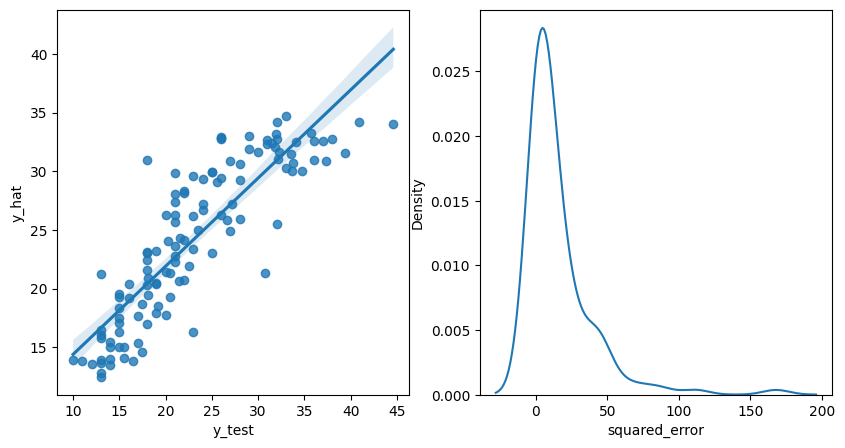

In [32]:
# 오차 분석
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.regplot(x='y_test', y='y_hat', data=test_preds, ax=axes[0]);
sns.kdeplot(x='squared_error', data=test_preds, ax=axes[1]);

In [33]:
# 기본 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# CSV 파일을 데이터 프레임으로 변환
df = pd.read_csv('auto-mpg.csv', header=None)

# 열 이름 지정
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
              'acceleration', 'model years', 'origin', 'names']

# horsepower 열의 자료형 변경(문자열 -> 숫자)
df['horsepower'] = df['horsepower'].replace('?', np.nan)    # '?'를 np.nan으로 변경
df['horsepower'] = df['horsepower'].astype('float')         # 문자열을 실수형으로 변경

# 결측치 대체
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].mean())

# 분석에 활용할 열(속성) 선택(연비, 실린더, 출력, 중량)
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]

# 속성(변수) 선택
X=ndf[['cylinders', 'horsepower', 'weight']]                # 독리비변수 X1, X2, X3
y=ndf['mpg']                                                # 종속 별수 y

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

print('훈련 데이터: ', X_train.shape)
print('검증 데이터: ', X_test.shape)

훈련 데이터:  (278, 3)
검증 데이터:  (120, 3)


In [34]:
# SKlearn 라이브러리에서 선현회귀분석 모듈 가져오기
from sklearn.linear_model import LinearRegression

# 단순 회귀분석 모형 객체 생성
lr = LinearRegression()

# train data를 가지고 모형 학습
lr.fit(X_train, y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
r_square = lr.score(X_test, y_test)
print('R^2 결정계수', r_square)

R^2 결정계수 0.6895968946794342


In [35]:
# 회기식의 기울기
print('X 변수의 계수 a: ', lr.coef_)

# 회기식의 y절편
print('상수항 b: ', lr.intercept_)

X 변수의 계수 a:  [-0.38212538 -0.04709428 -0.00514076]
상수항 b:  46.099484743282325


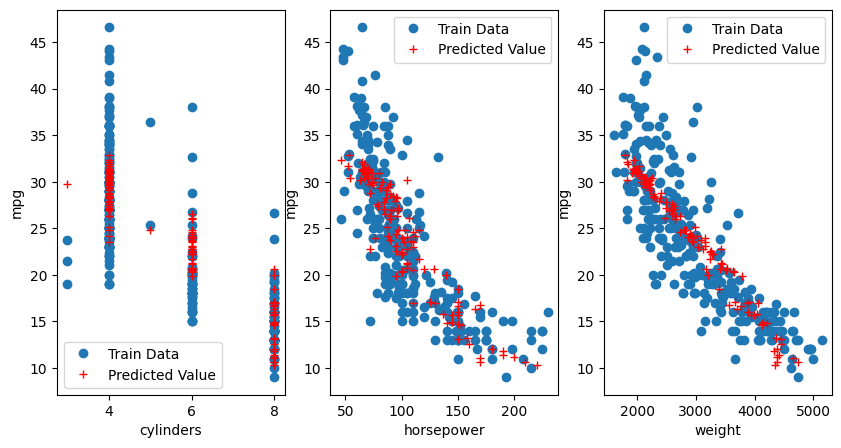

In [36]:
# train data의 산점도와 test data로 예측한 회귀선을 그래프로 출력
y_hat_test = lr.predict(X_test)

fig, axes = plt.subplots(1, 3, figsize=(10, 5))

for i, col in enumerate(X_test.columns):
    axes[i].plot(X_train[col], y_train, 'o', label='Train Data')            # 데이터 분포
    axes[i].plot(X_test[col], y_hat_test, 'r+', label='Predicted Value')    # 모형이 학습한 회귀선

    axes[i].set_xlabel(col)
    axes[i].set_ylabel('mpg')

    axes[i].legend(loc='best')

plt.show()

In [37]:
# 사이킷런 함수 활용(평균 제곱 오차)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_hat_test)
print('mse: ', np.round(mse, 2))

# 평균 절대값 오차
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_hat_test)
print('mae: ', np.round(mae, 2))

mse:  17.88
mae:  3.33


In [38]:
# 기본 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load_dataset 함수를 사용하여 데이터프레임으로 변환
df = sns.load_dataset('titanic')

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# 데이터 자료형 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [40]:
# 데이터 통계 요약정보 확인
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [41]:
# 데이터 통계 요약정보 확인(범주형)
df.describe(include='object')

,sex,embarked,who,embark_town,alive
count,891,889,891,889,891
unique,2,3,3,3,2
top,male,S,man,Southampton,no
freq,577,644,537,644,549


In [42]:
# 누락 데이터 확인
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [43]:
# 중복 데이터 확인
df.duplicated().sum()

np.int64(107)

In [44]:
# 목표 변수
df['survived'].value_counts()

survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='survived', ylabel='count'>

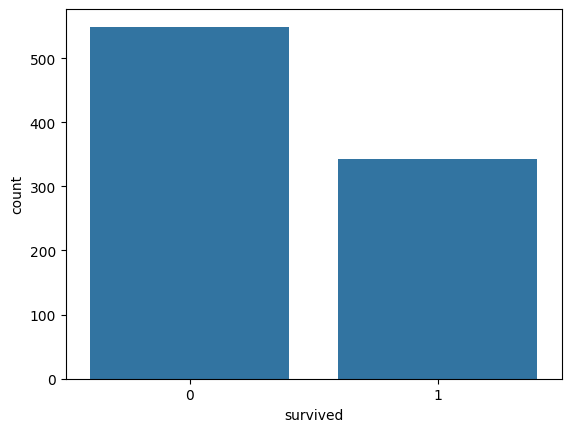

In [45]:
# 목표 변수 - 시각화
sns.countplot(data=df, x='survived')

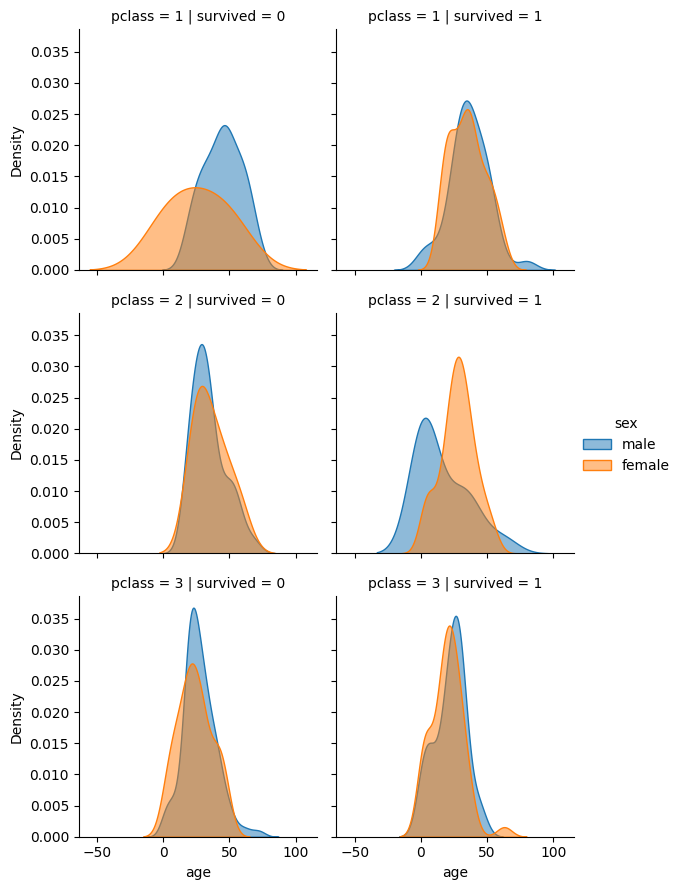

In [66]:
# 시각화
g = sns.FacetGrid(df, col='survived', row='pclass', hue='sex')
g.map(sns.kdeplot, 'age', alpha=0.5, fill=True)
g.add_legend();

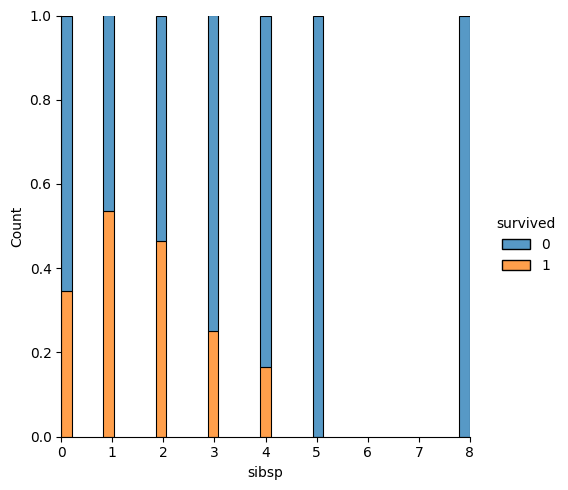

In [47]:
# 시각화
sns.displot(x='sibsp', kind='hist', hue='survived', data=df, multiple='fill');

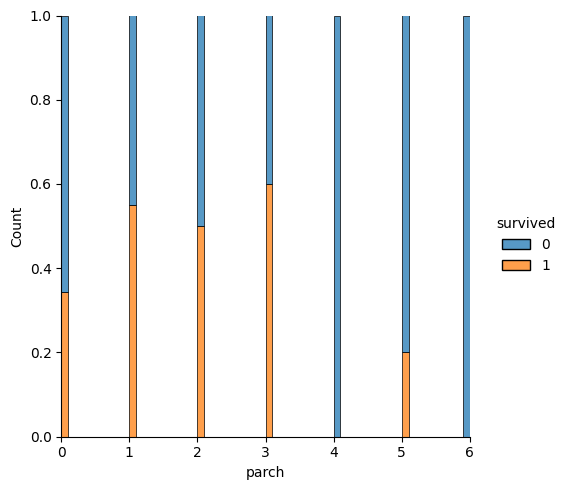

In [48]:
# 시각화
sns.displot(x='parch', kind='hist', hue='survived', data=df, multiple='fill');

<Axes: xlabel='embarked', ylabel='age'>

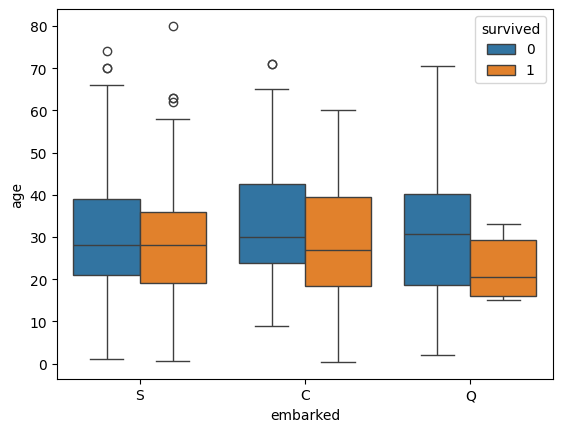

In [49]:
# 시각화
sns.boxplot(x='embarked', y='age', hue='survived', data=df)

In [50]:
# 중복 데이터 제거
print('중복 제거 이전: ', df.shape)
df = df.drop_duplicates()
print('중복 제거 이후: ', df.shape)

중복 제거 이전:  (891, 15)
중복 제거 이후:  (784, 15)


In [51]:
# NaN 값이 많은 deck 열을 삭제, embarked와 내용이 겹치는 embark_town 열을 삭제
rdf= df.drop(['deck', 'embark_town'], axis=1)
rdf.columns.values

array(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'alive', 'alone'],
      dtype=object)

In [52]:
# age 열에 나이 데이터가 없는 모든 행 삭제 - NaN 값
rdf = rdf.dropna(subset=['age'], how='any', axis=0)
print(len(rdf))


678


In [53]:
# embarked 열의 NaN 값을 승선도시 중에서 가장 많이 출현한 값으로 치환하기
most_freq = rdf['embarked'].value_counts(dropna=True).idxmax()
print(most_freq)

S


In [54]:
# mode 메소드 활용(최빈값)
most_freq2 = rdf['embarked'].mode()[0]
print(most_freq2)

S


In [55]:
# describe 메소드 활용(최빈값)
rdf.describe(include='object')

,sex,embarked,who,alive
count,678,676,678,678
unique,2,3,3,2
top,male,S,man,no
freq,422,520,382,394


In [56]:
# 최빈값으로 누락 데이터 치환하기
rdf['embarked'] = rdf['embarked'].fillna(most_freq)

# 결측치 확인하기
rdf.isnull().sum()

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
class         0
who           0
adult_male    0
alive         0
alone         0
dtype: int64

In [57]:
# 분석에 활용할 열(특성) 선택
ndf = rdf[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked']]
ndf.head()

,survived,pclass,sex,age,sibsp,parch,embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [58]:
# 원핫인코딩 - 범주형 데이터를 모형이 인식할 수 있도록 숫자형으로 변환
onehot_sex = pd.get_dummies(ndf['sex'])
ndf = pd.concat([ndf, onehot_sex], axis=1)

onehot_embarked = pd.get_dummies(ndf['embarked'], prefix='town')
ndf = pd.concat([ndf, onehot_embarked], axis=1)

ndf = ndf.drop(['sex', 'embarked'], axis=1)
ndf.head()

,survived,pclass,age,sibsp,parch,female,male,town_C,town_Q,town_S
0,0,3,22.0,1,0,False,True,False,False,True
1,1,1,38.0,1,0,True,False,True,False,False
2,1,3,26.0,0,0,True,False,False,False,True
3,1,1,35.0,1,0,True,False,False,False,True
4,0,3,35.0,0,0,False,True,False,False,True


In [59]:
# 속성(변수) 선택
X=ndf[['pclass', 'age', 'sibsp', 'parch', 'female', 'male',
       'town_C', 'town_Q', 'town_S']]       # 설명 변수 X
y=ndf['survived']                           # 예측 변수 y

# 설명 변수 데이터를 정규화(normalization)
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

# train data와 test data로 구분
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

print('train data 개수: ', X_train.shape)
print('test data 개수: ', X_test.shape)

train data 개수:  (474, 9)
test data 개수:  (204, 9)


In [60]:
# sklearn 라이브러리에서 KNN 분류 모형 가져오기
from sklearn.neighbors import KNeighborsClassifier

# 모형 객체 생성(k=5로 설정)
knn = KNeighborsClassifier(n_neighbors=5)

# trian data를 가지고 모형 학습
knn.fit(X_train, y_train)

# test data를 가지고 y_hat을 예측(분류)
y_hat = knn.predict(X_test)

print(y_hat[0:10])
print(y_test.values[0:10])

[0 1 0 1 0 0 1 1 1 1]
[1 1 0 1 0 1 1 1 1 0]


In [61]:
# 모형 성능 평가 = Confusion Matrix 계산
from sklearn import metrics
knn_matrix = metrics.confusion_matrix(y_test, y_hat)
print(knn_matrix)

[[99 24]
 [26 55]]


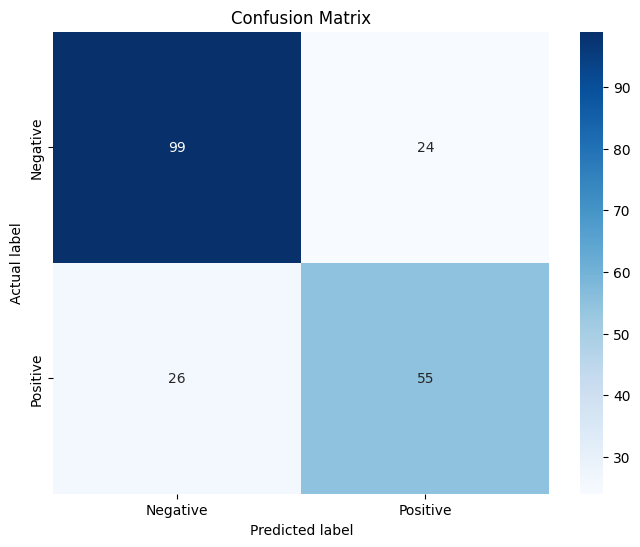

In [63]:
# Confusion Metrix 시각화
plt.figure(figsize=(8,6))
sns.heatmap(knn_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])

plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [64]:
# 모형 성능 평가 - 평가지표 계산
knn_report = metrics.classification_report(y_test,y_hat)
print(knn_report)

              precision    recall  f1-score   support

           0       0.79      0.80      0.80       123
           1       0.70      0.68      0.69        81

    accuracy                           0.75       204
   macro avg       0.74      0.74      0.74       204
weighted avg       0.75      0.75      0.75       204



In [ ]:
# 기본 라이브러리 불러오기
import pandas as pd
import 